In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

In [2]:
def show(img,vmin=0,vmax=255,vmset=False):
    plt.figure(figsize=(7,7))
    if vmset:
        plt.imshow(img,cmap="gray")
    else:
        plt.imshow(img,cmap="gray",vmin=vmin,vmax=vmax)
    plt.show()

# Part 1:

In [3]:
img_4_1=cv2.imread("4_1.png",cv2.IMREAD_GRAYSCALE)
img_4_1.shape

(558, 558)

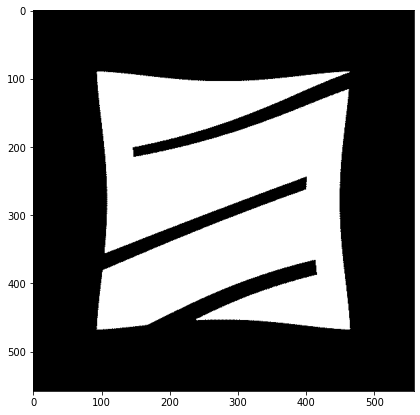

In [4]:
show(img_4_1)

In [5]:
chopper=cv2.imread("chopper.png",cv2.IMREAD_GRAYSCALE)
chopper.shape

(558, 558)

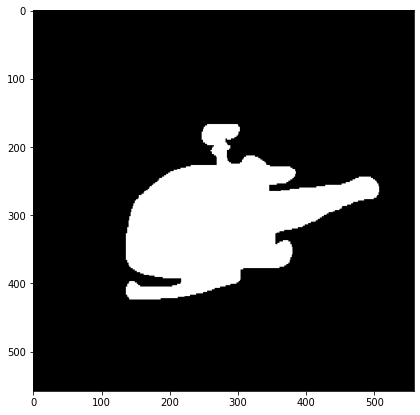

In [6]:
show(chopper)

# Part 2:
همانطور که در صفحه 24 اسلاید مورفولوژی داریم باید تصویر را منهای اروژن تصویر و کرنل مربعی بکنیم تا مرز ها به دست بیاید.

In [7]:
kernel = np.ones((3, 3), np.uint8)
boundares_of_4_1=img_4_1-cv2.erode(img_4_1, kernel, iterations=1)

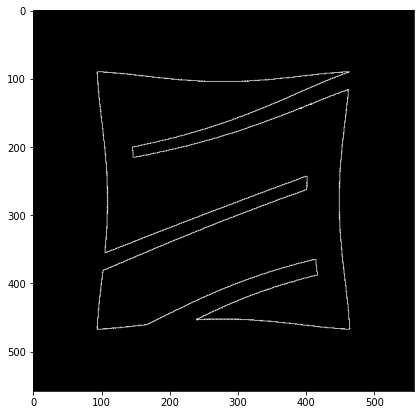

In [8]:
show(boundares_of_4_1)

# Part 3:
خیر.

در تفریق مورفولوژی همانند مجموعه ها رفتار می شود

In [9]:
def subtract(img1,img2):
    ans=img1.copy()
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            if img1[i][j]==255:
                if img2[i][j]==255:
                    ans[i][j]=0
    return ans

In [10]:
img_4_1_minus_chopper=subtract(img_4_1,chopper)

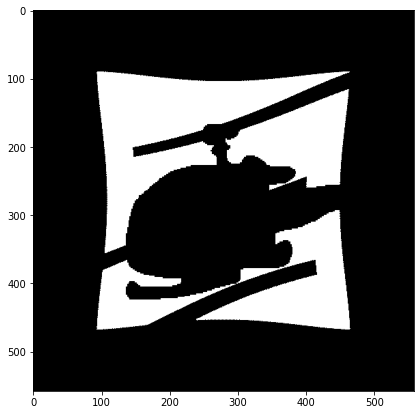

In [11]:
show(img_4_1_minus_chopper)

# Part 4:

In [12]:
blobs=cv2.imread("Blobs.png",cv2.IMREAD_GRAYSCALE)
blobs.shape

(600, 600)

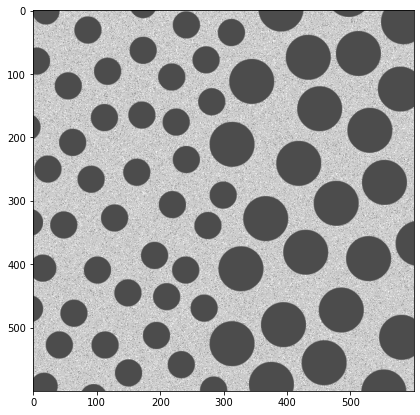

In [13]:
show(blobs)

# Part 5:

ابتدا کلوزینگ تصویر را با یک دیسک با شعاع 30 می گیریم و سپس اوپنینگ حاصل را با یک دیسک به شعاع 60 می گیریم

In [14]:
def closing(a,b):
    a_dilate_b=cv2.dilate(a,b,iterations=1)
    ans=cv2.erode(a_dilate_b,b,iterations=1)
    return ans

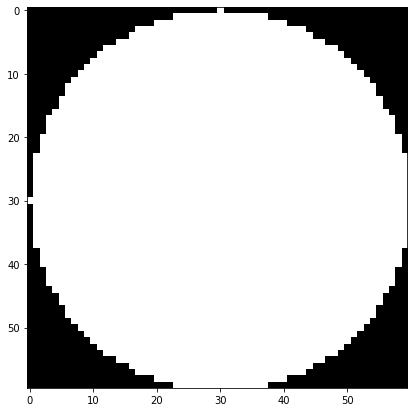

In [15]:
circle_kernel=np.zeros((60, 60), np.uint8)
for i in range(circle_kernel.shape[0]):
    for j in range(circle_kernel.shape[1]):
        if (i-30)**2+(j-30)**2<=900:
            circle_kernel[i][j]=1
show(circle_kernel,0,1)

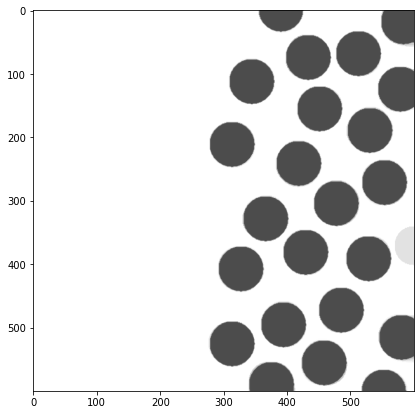

In [16]:
closing_result=closing(blobs,circle_kernel)
show(closing_result)

In [17]:
def opening(a,b):
    tmp=cv2.erode(a,b,iterations=1)
    ans=cv2.dilate(tmp,b,iterations=1)
    return ans

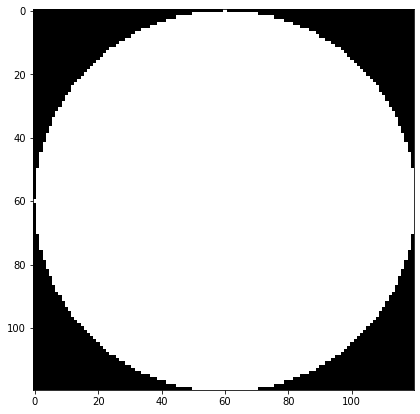

In [18]:
circle_kernel_2=np.zeros((120, 120), np.uint8)
for i in range(circle_kernel_2.shape[0]):
    for j in range(circle_kernel_2.shape[1]):
        if (i-60)**2+(j-60)**2<=3600:
            circle_kernel_2[i][j]=1
show(circle_kernel_2,0,1)

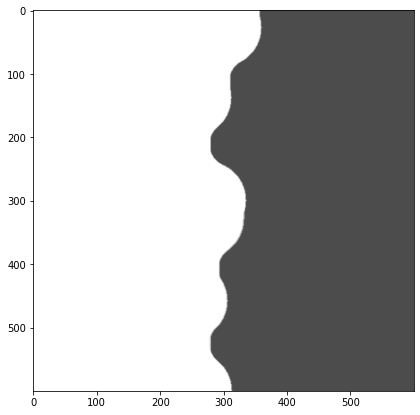

In [19]:
opening_result=opening(closing_result,circle_kernel_2)
show(opening_result)

# Part 6:

ابتدا تصویر را اسموث می کنیم و سپس اوپنینگ حاصل را با دیسک های 10 و 20 و 25 و 30 به دست می آوریم

In [20]:
def disk_creator(radius):
    circle_kernel=np.zeros((radius*2, radius*2), np.uint8)
    for i in range(circle_kernel.shape[0]):
        for j in range(circle_kernel.shape[1]):
            if (i-radius)**2+(j-radius)**2<=radius**2:
                circle_kernel[i][j]=1
    return circle_kernel

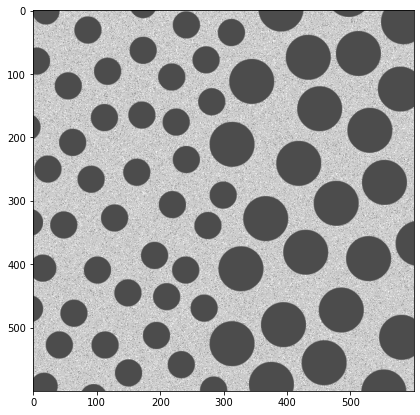

In [21]:
show(blobs)

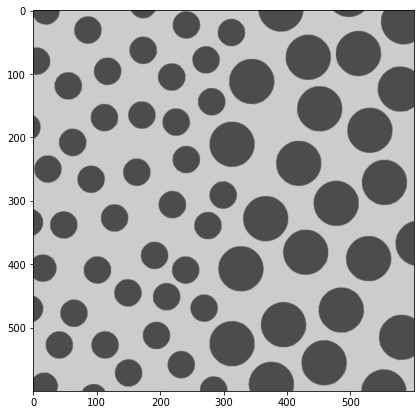

In [27]:
smoothed_blob=cv2.medianBlur(blobs,5)
show(smoothed_blob)

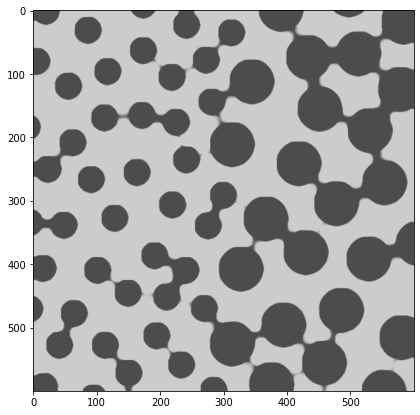

In [28]:
opening_radius_10=opening(smoothed_blob,disk_creator(10))
show(opening_radius_10)

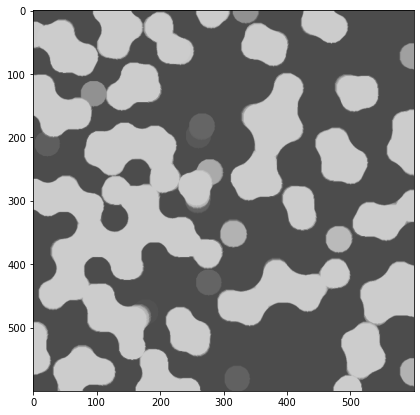

In [29]:
opening_radius_20=opening(smoothed_blob,disk_creator(20))
show(opening_radius_20)

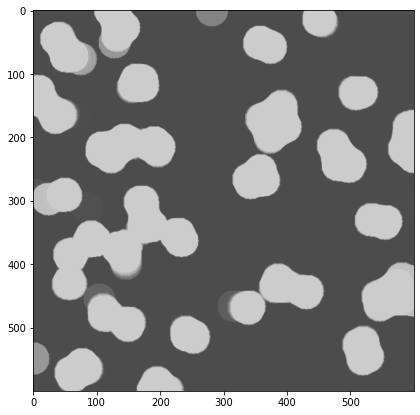

In [30]:
opening_radius_25=opening(smoothed_blob,disk_creator(25))
show(opening_radius_25)

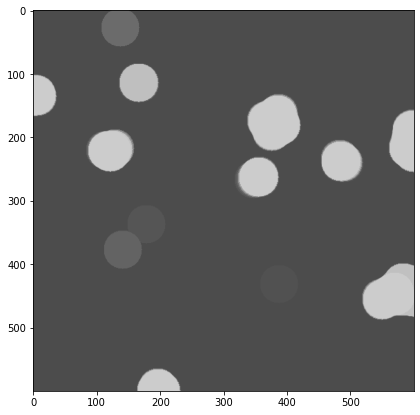

In [31]:
opening_radius_30=opening(smoothed_blob,disk_creator(30))
show(opening_radius_30)